<div style="border-radius:10px; padding: 15px; font-size:110%; text-align:left">
<h2 align="left"><font color=green>Importing Libraries</font></h2>

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib as plt

<div style="border-radius:10px; padding: 15px; font-size:100%; text-align:left">
<h2 align="left"><font color=skyblue>Data Preprocessing</font></h2>

<div style="border-radius:10px; padding: 15px; font-size:100%; text-align:left">
<h2 align="left"><font color=green>Training Image preprocessing</font></h2>

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'E:\\Fruits and Vegetables Recognition System\\Fruits and Vegetables Recognition\\train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3115 files belonging to 36 classes.


<div style="border-radius:10px; padding: 15px; font-size:100%; text-align:left">
<h2 align="left"><font color=Skyblue>Validation Image preprocessing</font></h2>

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'E:\\Fruits and Vegetables Recognition System\\Fruits and Vegetables Recognition\\validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 351 files belonging to 36 classes.


<div style="border-radius:10px; padding: 15px; font-size:100%; text-align:left">
<h2 align="left"><font color=skyblue>Building Model</font></h2>

In [4]:
cnn = tf.keras.models.Sequential()

<div style="border-radius:10px; padding: 15px; font-size:100%; text-align:left">
<h2 align="left"><font color=skyblue>Building Convolution Layer</font></h2>

In [5]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

c:\Users\bjbis\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [8]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [9]:
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))
cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.5)) #To avoid overfitting


In [10]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=36,activation='softmax'))
     

<div style="border-radius:10px; padding: 15px; font-size:100%; text-align:left">
<h2 align="left"><font color=radishblue>Compiling and Training Phase</font></h2>

In [11]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
cnn.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 62, 62, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 31, 31, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 29, 29, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     6,423,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 36)             │         9,252 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,629,188 (25.29 MB)

 Trainable params: 6,629,188 (25.29 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=32)

Epoch 1/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 44s 431ms/step - accuracy: 0.0344 - loss: 30.8220 - val_accuracy: 0.0285 - val_loss: 3.5831
Epoch 2/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 45s 402ms/step - accuracy: 0.0357 - loss: 3.5735 - val_accuracy: 0.0342 - val_loss: 3.5826
Epoch 3/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 21s 211ms/step - accuracy: 0.0351 - loss: 3.5805 - val_accuracy: 0.0313 - val_loss: 3.5702
Epoch 4/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 21s 213ms/step - accuracy: 0.0462 - loss: 3.5658 - val_accuracy: 0.0399 - val_loss: 3.5585
Epoch 5/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 21s 212ms/step - accuracy: 0.0502 - loss: 3.5127 - val_accuracy: 0.0912 - val_loss: 3.3214
Epoch 6/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 22s 219ms/step - accuracy: 0.0753 - loss: 3.3849 - val_accuracy: 0.1538 - val_loss: 3.1290
Epoch 7/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 21s 214ms/step - accuracy: 0.0923 - loss: 3.2415 - val_accuracy: 0.2222 - val_loss: 2.9663
Epoch 8/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 21s 209ms/step - accuracy: 0.1253 - loss: 3.1280 - val_acc

<div style="border-radius:10px; padding: 15px; font-size:100%; text-align:left">
<h2 align="left"><font color=radishblue>Evaluating Model</font></h2>


In [13]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

98/98 ━━━━━━━━━━━━━━━━━━━━ 12s 119ms/step - accuracy: 0.7986 - loss: 0.7276
Training accuracy: 0.8128411173820496


In [14]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 127ms/step - accuracy: 0.8308 - loss: 0.8047
Validation accuracy: 0.8347578644752502


<div style="border-radius:10px; padding: 15px; font-size:100%; text-align:left">
<h2 align="left"><font color=green>Saving Model</font></h2>




In [15]:
cnn.save('trained_model.h5')
training_history.history #Return Dictionary of history

{'accuracy': [0.034991975873708725,
  0.03210273012518883,
  0.03146067261695862,
  0.04783306643366814,
  0.05714285746216774,
  0.07447832822799683,
  0.09534510225057602,
  0.13322632014751434,
  0.13451042771339417,
  0.18202246725559235,
  0.23210272192955017,
  0.26163724064826965,
  0.29598715901374817,
  0.3309791386127472,
  0.3762439787387848,
  0.3926163613796234,
  0.41894060373306274,
  0.4465489685535431,
  0.48121991753578186,
  0.5024077296257019,
  0.513322651386261,
  0.5287319421768188,
  0.5585874915122986,
  0.5791332125663757,
  0.6057785153388977,
  0.6073836088180542,
  0.6253611445426941,
  0.6327447891235352,
  0.6536115407943726,
  0.6754413843154907,
  0.6715890765190125,
  0.6895666122436523],
 'loss': [10.548233985900879,
  3.5772719383239746,
  3.579026222229004,
  3.5531249046325684,
  3.4809329509735107,
  3.3527910709381104,
  3.2144408226013184,
  3.10209584236145,
  3.057044506072998,
  2.888340711593628,
  2.749300003051758,
  2.6340320110321045,
  

In [16]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)
  print(training_history.history.keys())


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


Calculating Accuracy of Model Achieved on Validation set


In [17]:
print("Validation set Accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))

Validation set Accuracy: 83.47578644752502 %


<h1>Accuracy Visualization</h1>

<div style="border-radius:10px; padding: 15px; font-size:100%; text-align:left">
<h2 align="left"><font color=green>Training Visualization</font></h2>

In [18]:
#training_history.history['accuracy']

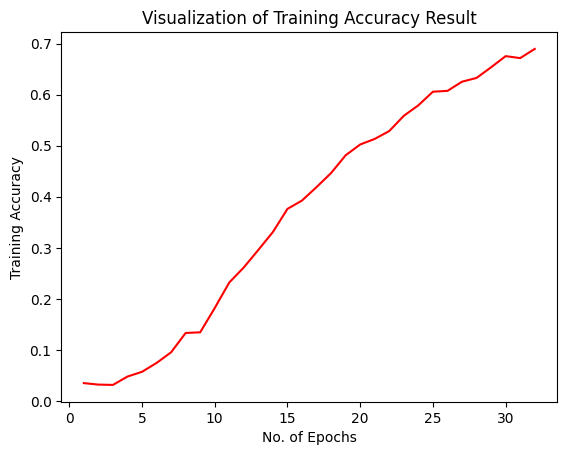

In [20]:
import matplotlib.pyplot as plt
# Assuming training_history is the result from model.fit()
epochs = [i for i in range(1, len(training_history.history['accuracy']) + 1)]
# Plot the training accuracy
plt.plot(epochs, training_history.history['accuracy'], color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Training Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()


<div style="border-radius:10px; padding: 15px; font-size:100%; text-align:left">
<h2 align="left"><font color=green>Validation Accuracy</font></h2>



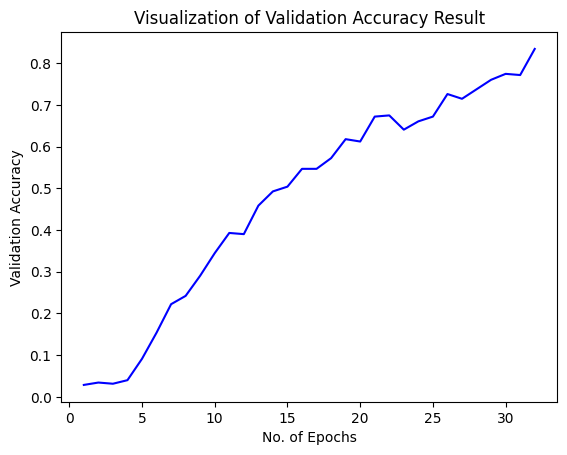

In [21]:
plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()

<div style="border-radius:10px; padding: 15px; font-size:100%; text-align:left">
<h2 align="left"><font color=green>Test set Evaluation</font></h2>

In [22]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'E:\\Fruits and Vegetables Recognition System\\Fruits and Vegetables Recognition\\test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 359 files belonging to 36 classes.


In [23]:
test_loss,test_acc = cnn.evaluate(test_set)
print('Test accuracy:', test_acc)

12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 177ms/step - accuracy: 0.8352 - loss: 0.7275
Test accuracy: 0.8300835490226746
